In [1]:
from keras.models import Sequential

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda0: GeForce GTX 750 Ti (0000:01:00.0)


In [2]:
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
topics_filename = 'lda_data300b_all.csv'
train_filename = 'train.csv'
data_ncol = 600

In [13]:
df = pd.read_csv(topics_filename, header=None)
df = df.drop(data_ncol,1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376693,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(404290, 600)

In [15]:
df_text = pd.read_csv(train_filename).fillna("")
df_text.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [16]:
print df_text.shape
print df.shape

(404290, 6)
(404290, 600)


In [17]:
X = df.values
y = df_text.iloc[:,-1:].values.ravel()
del df_text

In [18]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed) 

In [19]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint 

In [20]:
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
    model = Sequential()
    model.add(Dense(600, input_dim=600, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(600, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], y[train], epochs=10, batch_size=10000, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 74.44%
acc: 74.53%
acc: 74.83%
acc: 74.49%
acc: 74.91%
acc: 74.54%
acc: 73.98%
acc: 74.71%
acc: 74.53%
acc: 74.81%
74.58% (+/- 0.25%)


In [21]:
#create model
model = Sequential()
model.add(Dense(600, input_dim=600, kernel_initializer='uniform', activation='relu'))
model.add(Dense(600, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint 
filepath='weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc' , verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, callbacks=callbacks_list, batch_size=10000)

Train on 270874 samples, validate on 133416 samples
Epoch 1/20
270874/270874 [==============================] - 4s - loss: 0.6529 - acc: 0.6274 - val_loss: 0.6327 - val_acc: 0.6312
Epoch 2/20
270874/270874 [==============================] - 2s - loss: 0.6256 - acc: 0.6489 - val_loss: 0.6204 - val_acc: 0.6677
Epoch 3/20
270874/270874 [==============================] - 2s - loss: 0.6101 - acc: 0.6765 - val_loss: 0.5958 - val_acc: 0.6864
Epoch 4/20
270874/270874 [==============================] - 2s - loss: 0.5766 - acc: 0.6948 - val_loss: 0.5707 - val_acc: 0.6965
Epoch 5/20
270874/270874 [==============================] - 2s - loss: 0.5464 - acc: 0.7132 - val_loss: 0.5493 - val_acc: 0.7079
Epoch 6/20
270874/270874 [==============================] - 2s - loss: 0.5212 - acc: 0.7305 - val_loss: 0.5378 - val_acc: 0.7155
Epoch 7/20
270874/270874 [==============================] - 2s - loss: 0.4976 - acc: 0.7467 - val_loss: 0.5302 - val_acc: 0.7252
Epoch 8/20
270874/270874 [===================

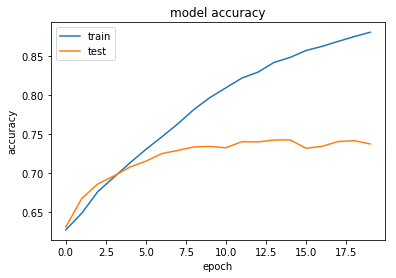

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [23]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

133088/133416 [============================>.] - ETA: 0s 

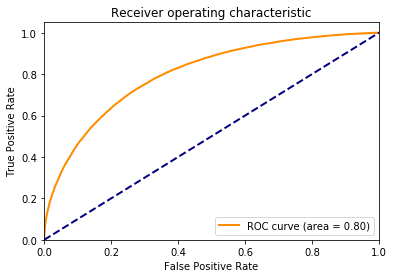

In [24]:
# load weights
model.load_weights("weights.best.hdf5")
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

269024/270874 [============================>.] - ETA: 0s  

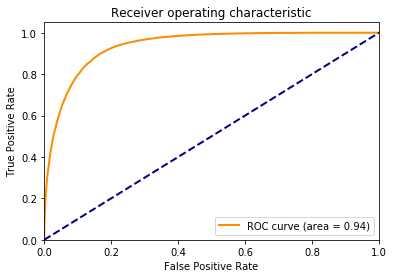

In [25]:
# load weights
model.load_weights("weights.best.hdf5")
y_pred_prob = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dropout
#create model
model = Sequential()
model.add(Dropout(0.2, input_shape=(600,)))
model.add(Dense(600, input_dim=600, kernel_initializer='uniform', 
                activation='relu',  kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(600, kernel_initializer='uniform', activation='relu',
                kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#sgd = SGD(lr=1.0, momentum=0.9, decay=0.001, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# checkpoint 
filepath='weights_do.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc' , verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), batch_size=10000, callbacks=callbacks_list)

Train on 270874 samples, validate on 133416 samples
Epoch 1/20
270874/270874 [==============================] - 3s - loss: 0.6555 - acc: 0.6254 - val_loss: 0.6346 - val_acc: 0.6312
Epoch 2/20
270874/270874 [==============================] - 2s - loss: 0.6318 - acc: 0.6398 - val_loss: 0.6223 - val_acc: 0.6651
Epoch 3/20
270874/270874 [==============================] - 2s - loss: 0.6215 - acc: 0.6657 - val_loss: 0.6063 - val_acc: 0.6813
Epoch 4/20
270874/270874 [==============================] - 2s - loss: 0.6005 - acc: 0.6793 - val_loss: 0.5810 - val_acc: 0.6929
Epoch 5/20
270874/270874 [==============================] - 2s - loss: 0.5836 - acc: 0.6868 - val_loss: 0.5700 - val_acc: 0.6958
Epoch 6/20
270874/270874 [==============================] - 2s - loss: 0.5740 - acc: 0.6932 - val_loss: 0.5644 - val_acc: 0.7006
Epoch 7/20
270874/270874 [==============================] - 2s - loss: 0.5644 - acc: 0.6979 - val_loss: 0.5565 - val_acc: 0.7047
Epoch 8/20
270874/270874 [===================

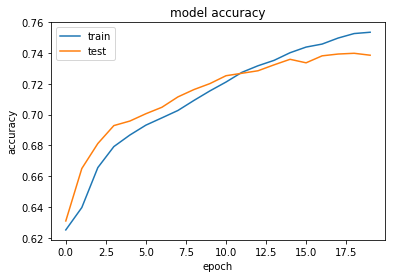

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

132544/133416 [============================>.] - ETA: 0s

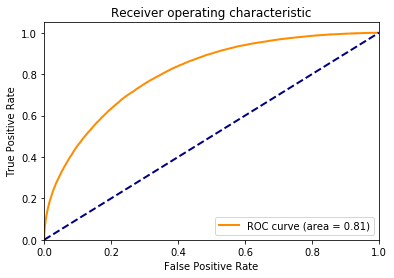

In [28]:
# load weights
model.load_weights("weights_do.best.hdf5")
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

268832/270874 [============================>.] - ETA: 0s  

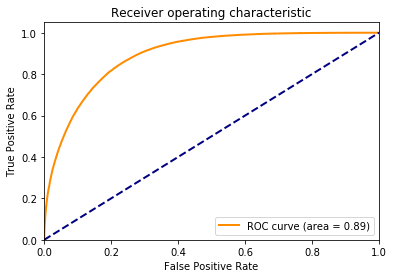

In [29]:
y_pred_prob = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()